#                PRCP-1015-EquakeDamagePred

# 1 Problem Statement

A:- Prepare a complete data analysis report on the given data.

B:- Create a predictive model in such a way that the objective is to predict
the ordinal variable “damage_grade”. This column presents the level of damage
grade affected by the earthquake.

C:- Suggestions to the Seismologists to avoid earthquake event leading to
significant damage in many buildings

# 2 DATA COLLECTION
* Know what data I needed
*	Identify data sources (train_values.csv and train_labels.csv)
*	Load the data using pd.read_csv()
# 3 EDA ( Exploratory Data Analysis )
* Explore the datasets using .shape, .head() ,  statistics like describe() object
*	Merge datasets using pd.merge()
* checkin missing value
* Target Variable Analysis (damage_grade)
*	Identify categorical columns , Remove 'building_id' since it's an identifier, not a feature , View Unique Values , Plot Distribution of Each Categorical Feature , Relationship with Target Variable (damage_grade)
* Identify Numerical Features , Exclude 'damage_grade' (target) and 'building_id' (identifier) , summary statis , Distribution Plot (Histograms) , Boxplots (Detect Outliers) , Relationship with Target Variable , create and interpret a correlation heatmap
# 4 DATA PREPROCESSING
* Install Xgboost narplotlib seaborn
* Load the data
* Drop building ID if it exist
* Separate feature target
* Handling missing value
* Removing missing value
* Chect if any missing value remaining
* Drop duplicate row
* Check how many full duplicate rows exist
* Standard numerical column ( optional but good for deep learning )
* Fill numerical missing values with median
* Encode categorical column
* Fill categorical missing values with mode
* Identify categorical columns , One-Hot Encode categorical variables , All categorical columns are now encoded as 0/1 dummy variables
* start the FEATURE ENGINEERING :
 Height per floor , Age binning - Removing this as it was causing issues , Area per floor , Strong material score , Weak foundation flag - Removing this as it was causing issues , Total number of superstructure types and check the column
# 8	Train/test split
* Separate feature and target
* Train_test_split to divide the dataset
# 9 MODEL CREATION , Prediction , Evaluation


Model creation and training for import RandomForestClassifier
* Importing the necessary libraries
* Initialize the model
* fit the model om training data
* make prediction on validation data
* evaluate the model
* print and plot confusion matrix
* Plot the confusion matrix and visualize the confusion matrix
* Make prediction and validation data
* Calculate and print accuracy
* Print classification report
* Print and plot confussion matrix
* Plot the confusion matrix ( require matplotlib ) and visualization the confusion matrix
* Predict damage grade and validation
* Predict class probabilites ( useful for advanced matrics and ensable )
* Convert probabilites to predict classes
* Choose the class with the highest probabilites for each rows
* Convert probabilites to classes label
* prediction and evaluation


 Install XGboost
* Import and initialize Xgboost
* Initialize the model
* Fit the model to you and training data
* Predict and evaluate
* Predict and validation set
* Evaluation

CatBoost
* Install catboost
* Import and train catboost
* initialize and train catboost
* Train the model
* Predict and validation set
* Predict

LightGBM
* Install lightgbm
* Import and train lightgbm
* Initialize and train model
* Predict and validation set
* Evaluate model performance
# 13 Model evaluation and comparision , Hyperparameter Tuning , Final Evaluation the tuned model, Feature Importance , Preprocess Test Set (test_values.csv) , Predict on Test Set , Create Submission File , Save Your Final Model

Model comparision

* Prepare all the model to dictionary
* Loop over model and compare accuracy
* Plot a bar chart for visual comparision

Fast grid ANN hyperparameter Tuning

* Define the ANN model
* Fast Hyperparameter Grid
* Setup grid search
* Train
* Evaluate

Final Evaluate and tuned model

* Evaluate the tuned MLP model on the validation set
* Make prediction using the best tuned model

Feature Importance

* Calculate feature importance for the best model ( LightGBM )
* Assuminf lgb model is your best tuned model
* Feature importance are available after fitting the model
* Create a dataframe for better visualization
* Sort feature of importance
* Print top N feature ( optional )
* Visualize feature importance

Preprocess the test set

* Upload the test value file and import os
* Load the test dataset
* Store building id for submission
* Drop building id from the test set feature
* Apply the same feature engineering step as the training data
a) Heigh per floor b) area per floor c) strong material store d) total number of superstructure types
* Apply the same encoding to categorical feature as used in the training data
* Used the label encode fitted on the training data
* One hot encode categorical variable in test set
* Align column with the training set after one hot encode
* Align column add the missing column that were in training but not in test ( filled with 0 )
* Ensure the order of column is the same as the training set

Predict on test set

* Predict on test set using the best model ( LightGBM)
* Since the target variable was shifted by -1 for the training ( 0,1,2 )
* We need to add 1 back to get the original damage grade ( 1,2,3)

Create submission file

* Create the dataframe with building id and damage grade
* Save the submission file

Save the model

* Import jiblib
* Define the file name for the save model
* Save the train model


# 14 challenge face

* File Access & Setup (Colab)
Encountered FileNotFoundError when loading test data due to missing uploads or incorrect filenames. This was resolved by correctly uploading files and verifying file paths.

* Test Set Preprocessing
A common issue was mismatched columns or encoders between training and test sets, causing KeyError or shape mismatch during prediction. This required careful feature alignment and fallback strategies.

* ANN Training Time
ANN models (MLPClassifier) were slow to train, especially with large parameter grids. This was addressed by simplifying the hyperparameter space and using RandomizedSearchCV instead of GridSearchCV.

* Label Encoding Consistency
Reusing the same LabelEncoder instances across training and test sets was critical. When encoders were lost, fallback encoding strategies were used to ensure test set compatibility.

* Model Selection and Trade-offs
Balancing accuracy, training time, and interpretability across models was a challenge. While ANN offered deep learning flexibility, tree-based models like XGBoost performed comparably with less effort.

* Submission Format
Generating the correct submission.csv format (building_id, damage_grade) was essential. Errors in column naming or missing IDs caused submission failures early on.

* Final Outcome
A robust and tested prediction pipeline was developed, capable of transforming raw structural data into accurate damage grade predictions. The project not only built technical skills in feature engineering, model tuning, and pipeline design, but also simulated a real-world machine learning workflow from data ingestion to deployment.


# 15 conclusion

The Earthquake Damage Prediction project successfully demonstrated the application of machine learning techniques to a real-world disaster scenario. By systematically preprocessing the data, engineering meaningful structural features, and evaluating multiple classification models, we were able to develop an effective pipeline for predicting building damage grades based on structural attributes.

Among the various models tested, tree-based algorithms such as XGBoost and Random Forest delivered strong performance, while Artificial Neural Networks (ANN) were optimized through hyperparameter tuning to explore deep learning capabilities. Careful preprocessing of the test set ensured consistency and robustness in predictions.

The project highlighted the importance of aligning domain knowledge with machine learning workflows — especially in tasks involving tabular data and multiclass classification. It also emphasized practical challenges like test-time feature engineering, encoding consistency, and model tuning for scalability and accuracy.

This end-to-end solution can serve as a strong foundation for further development in disaster impact assessment, urban risk modeling, and rapid response planning.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # For classification
# from sklearn.linear_model import LinearRegression  # If it's a regression problem
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
# from sklearn.metrics import mean_squared_error, r2_score  # For regression

Load the main dataset

In [2]:
# Load training values (features)
values_df = pd.read_csv('/content/train_values.csv')

# Load training labels (target)
labels_df = pd.read_csv('/content/train_labels.csv')
df = pd.merge(values_df, labels_df, on='building_id')
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6.0,487.0,12198.0,2.0,30.0,6.0,5.0,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,28830,8.0,900.0,2812.0,2.0,10.0,8.0,7.0,o,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,94947,21.0,363.0,8973.0,2.0,10.0,5.0,5.0,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,590882,22.0,418.0,10694.0,2.0,10.0,6.0,5.0,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,201944,11.0,131.0,1488.0,3.0,30.0,8.0,9.0,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174838,253929,12.0,615.0,12032.0,2.0,10.0,4.0,4.0,n,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
174839,463266,14.0,1109.0,11919.0,2.0,20.0,7.0,6.0,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
174840,806639,10.0,151.0,708.0,2.0,25.0,5.0,5.0,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
174841,613000,2.0,708.0,7839.0,3.0,15.0,16.0,8.0,t,u,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [3]:
# Basic Info
print(df.shape)

(174843, 40)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174843 entries, 0 to 174842
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             174843 non-null  int64  
 1   geo_level_1_id                          174843 non-null  float64
 2   geo_level_2_id                          174843 non-null  float64
 3   geo_level_3_id                          174843 non-null  float64
 4   count_floors_pre_eq                     174843 non-null  float64
 5   age                                     174843 non-null  float64
 6   area_percentage                         174843 non-null  float64
 7   height_percentage                       174843 non-null  float64
 8   land_surface_condition                  174843 non-null  object 
 9   foundation_type                         174843 non-null  object 
 10  roof_type                               1748

In [5]:
# Summary statistics
print(df.describe())

        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  1.748430e+05   174843.000000   174843.000000   174843.000000   
mean   5.261028e+05       13.911543      700.846457     6264.979067   
std    3.043702e+05        8.028462      412.724393     3644.994601   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.620830e+05        7.000000      350.000000     3081.000000   
50%    5.265660e+05       12.000000      701.000000     6278.000000   
75%    7.901545e+05       21.000000     1050.000000     9413.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        174843.000000  174843.000000    174843.000000      174843.000000   
mean              2.130666      26.409779         8.010701           5.437930   
std               0.727526      72.706381         4.393440           1.915523   
min               1.000000       0.0

In [6]:
# Summary Object
df.describe(include='O')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,174843,174843,174843,174843,174843,174843,174843,174843
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,145448,147090,122588,140707,110858,135597,167799,168275


In [7]:
# Check for Missing Values
# Show count of missing values for each column
missing_values = df.isnull().sum()

# Show only columns that have missing values
missing_values = missing_values[missing_values > 0]
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Series([], dtype: int64)


In [8]:
#getting catagorial and numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
catagorial_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('\nwe have {} numerical features:{}'.format(len(numerical_features),numerical_features))
print('\nwe have {} catagorial features:{}'.format(len(catagorial_features),catagorial_features))


we have 32 numerical features:['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade']

we have 8 catagorial features:['land_surface_condition', 'foundation_type', 'roof

# EDA ( Exploratory Data Analysis )

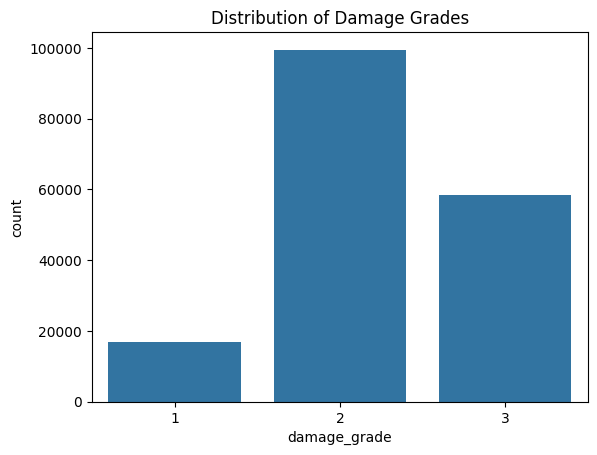

damage_grade
2    56.896187
3    33.448866
1     9.654948
Name: proportion, dtype: float64


In [9]:
# Target Variable (damage_grade) Analysis

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='damage_grade', data=df)
plt.title("Distribution of Damage Grades")
plt.show()

print(df['damage_grade'].value_counts(normalize=True) * 100)

In [10]:
# Identify Categorical Features
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove 'building_id' since it's an identifier, not a feature
if 'building_id' in categorical_cols:
    categorical_cols.remove('building_id')

print("Categorical features:", categorical_cols)

Categorical features: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']


In [11]:
# View Unique Values
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


land_surface_condition:
land_surface_condition
t    145448
n     23775
o      5620
Name: count, dtype: int64

foundation_type:
foundation_type
r    147090
w     10178
u      9516
i      7071
h       988
Name: count, dtype: int64

roof_type:
roof_type
n    122588
q     41408
x     10847
Name: count, dtype: int64

ground_floor_type:
ground_floor_type
f    140707
x     16672
v     16465
z       655
m       344
Name: count, dtype: int64

other_floor_type:
other_floor_type
q    110858
x     29314
j     26633
s      8038
Name: count, dtype: int64

position:
position
s    135597
t     28751
j      8908
o      1587
Name: count, dtype: int64

plan_configuration:
plan_configuration
d    167799
q      3782
u      2469
s       225
c       211
a       178
o       110
m        30
n        25
f        14
Name: count, dtype: int64

legal_ownership_status:
legal_ownership_status
v    168275
a      3771
w      1817
r       980
Name: count, dtype: int64


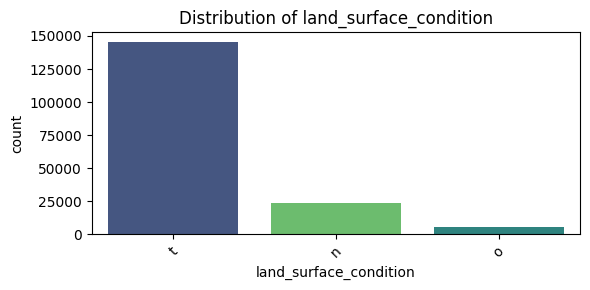

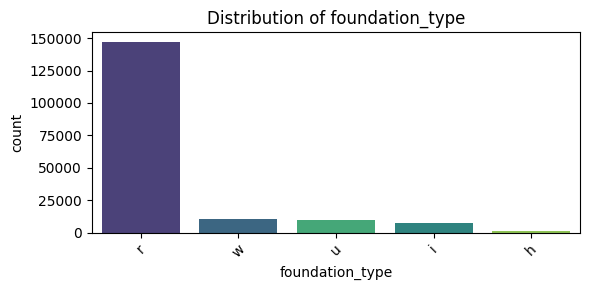

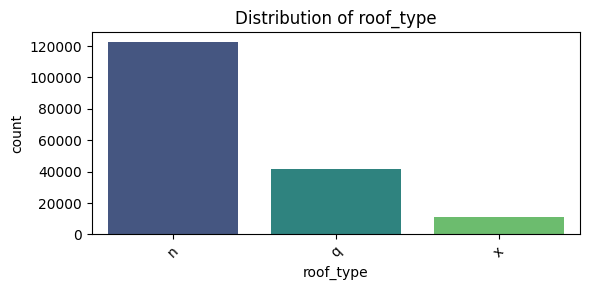

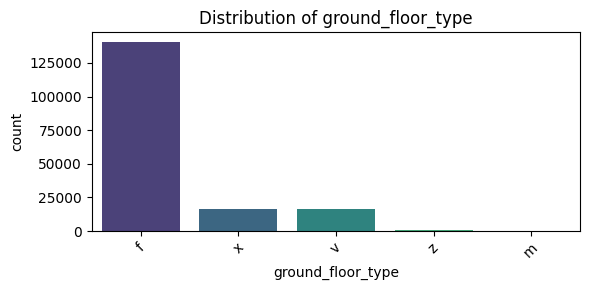

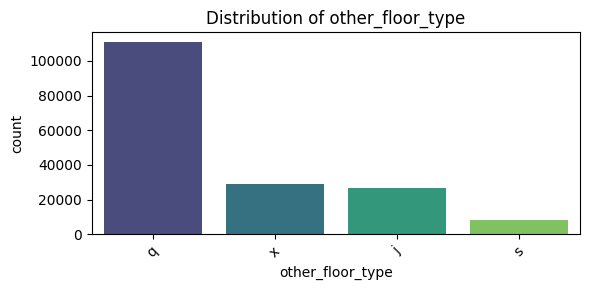

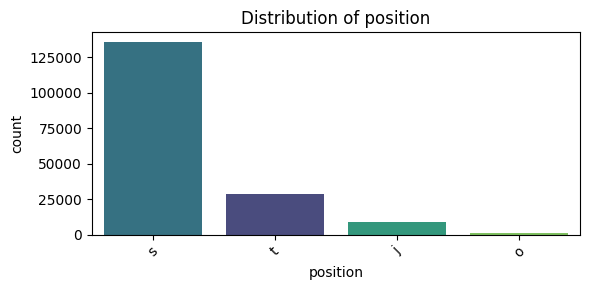

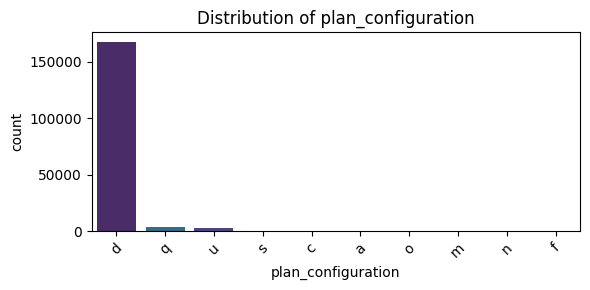

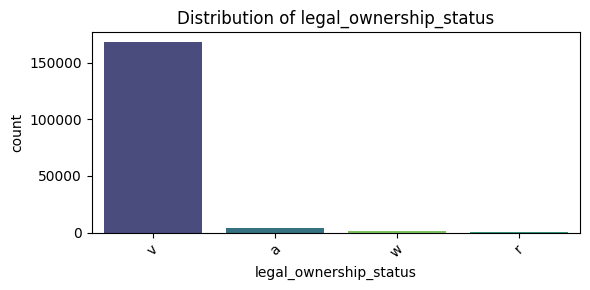

In [12]:
# Plot Distribution of Each Categorical Feature
import matplotlib.pyplot as plt
import seaborn as sns

# Identify Categorical Features again to ensure the list is up-to-date
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

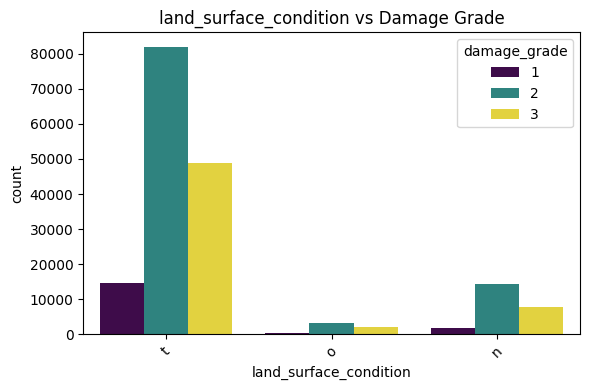

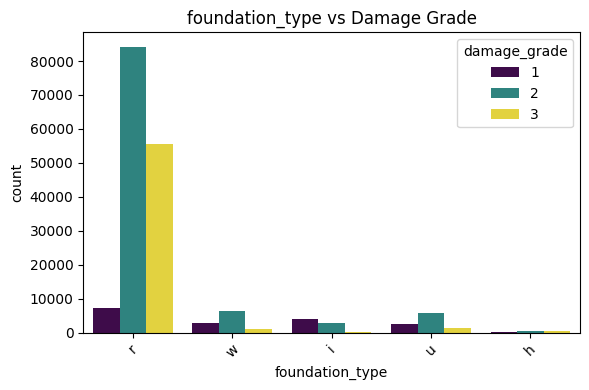

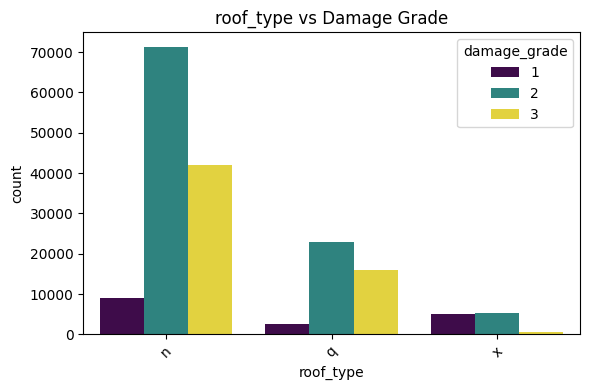

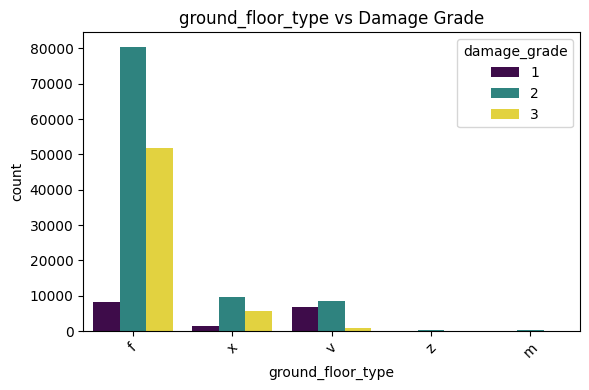

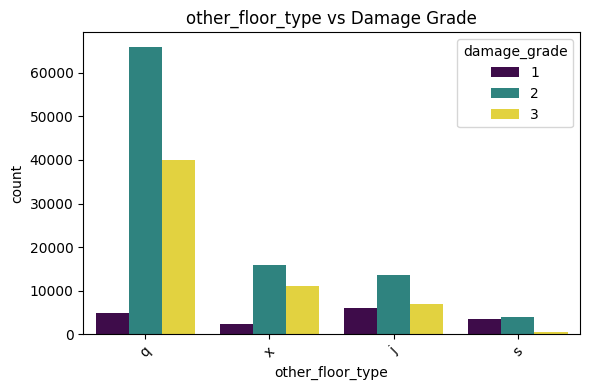

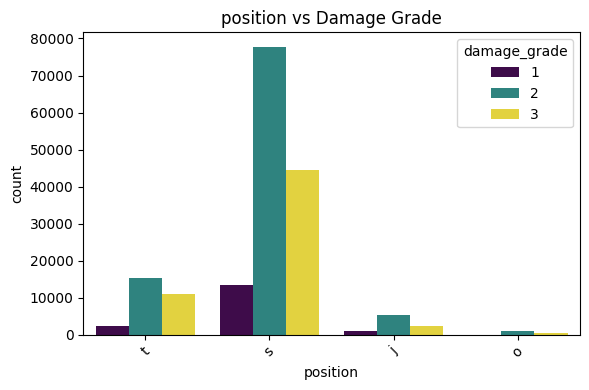

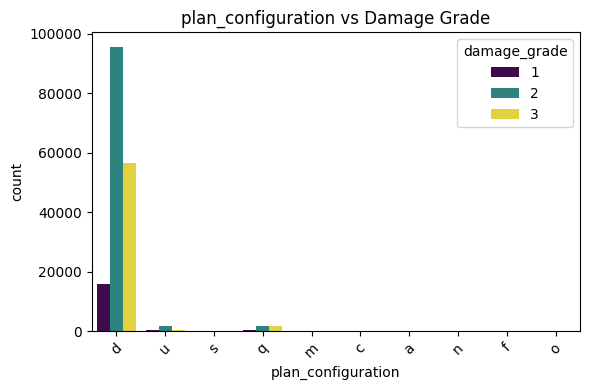

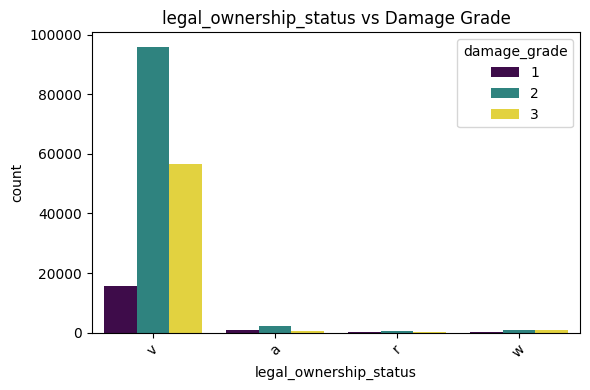

In [13]:
# Relationship with Target Variable (damage_grade)
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='damage_grade', palette='viridis')
    plt.title(f'{col} vs Damage Grade')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
# Identify Numerical Features
# Exclude 'damage_grade' (target) and 'building_id' (identifier)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in ['damage_grade', 'building_id']:
    if col in numerical_cols:
        numerical_cols.remove(col)

print("Numerical columns:", numerical_cols)

Numerical columns: ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']


In [15]:
# Summary Statistics
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
geo_level_1_id,174843.0,13.911543,8.028462,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,174843.0,700.846457,412.724393,0.0,350.0,701.0,1050.0,1427.0
geo_level_3_id,174843.0,6264.979067,3644.994601,0.0,3081.0,6278.0,9413.0,12567.0
count_floors_pre_eq,174843.0,2.130666,0.727526,1.0,2.0,2.0,2.0,9.0
age,174843.0,26.409779,72.706381,0.0,10.0,15.0,30.0,995.0
area_percentage,174843.0,8.010701,4.393440,1.0,5.0,7.0,9.0,100.0
height_percentage,174843.0,5.437930,1.915523,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,174843.0,0.089103,0.284893,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,174843.0,0.762364,0.425636,0.0,1.0,1.0,1.0,1.0
has_superstructure_stone_flag,174843.0,0.034419,0.182305,0.0,0.0,0.0,0.0,1.0


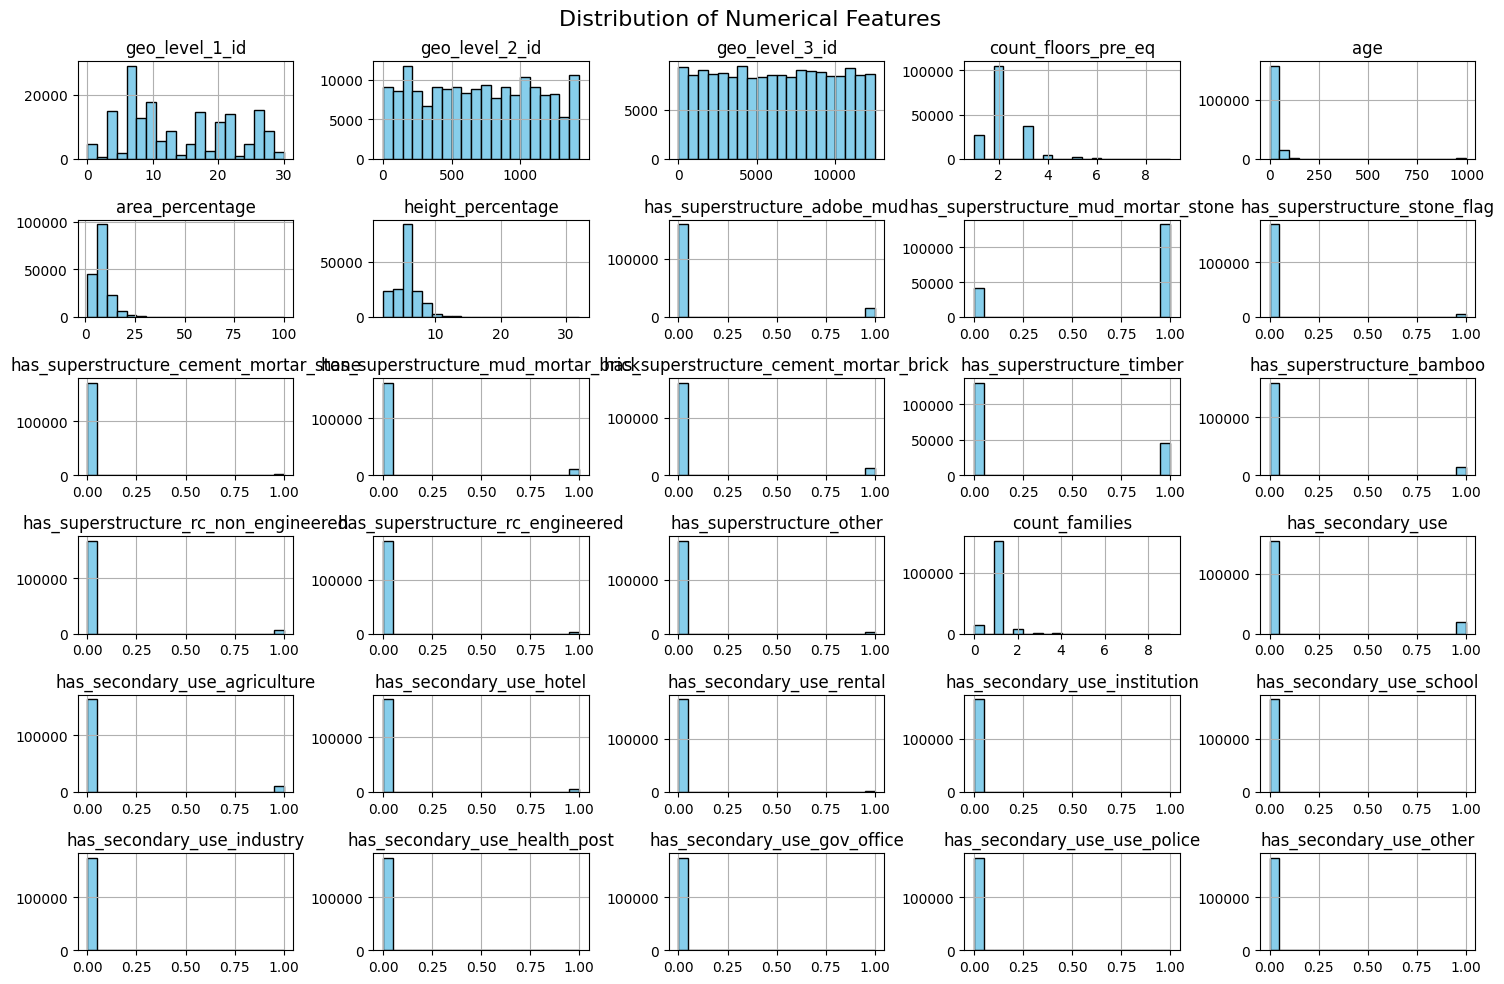

In [16]:
# Distribution Plot (Histograms)
import matplotlib.pyplot as plt

df[numerical_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

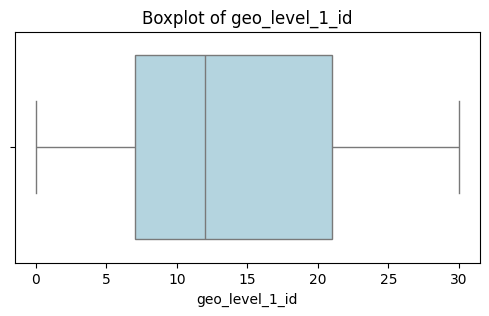

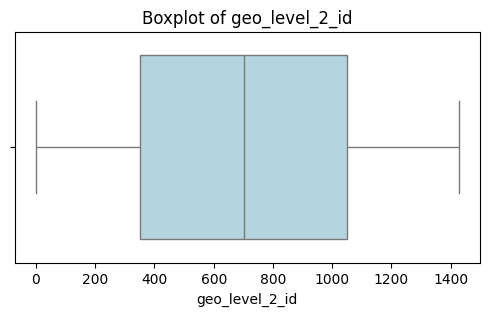

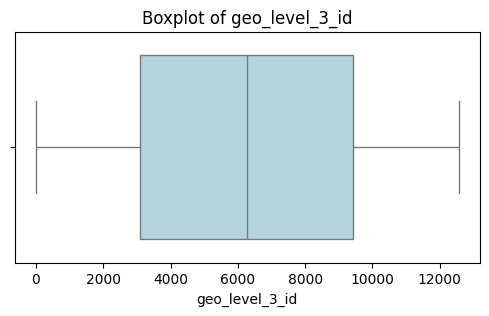

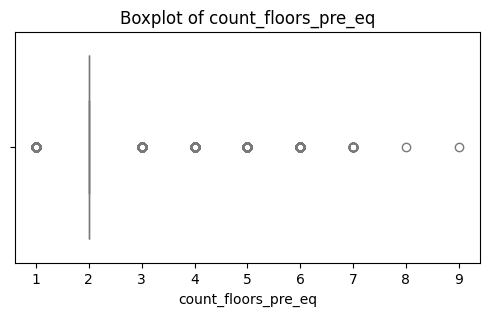

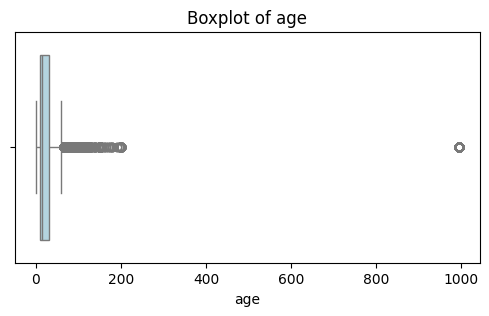

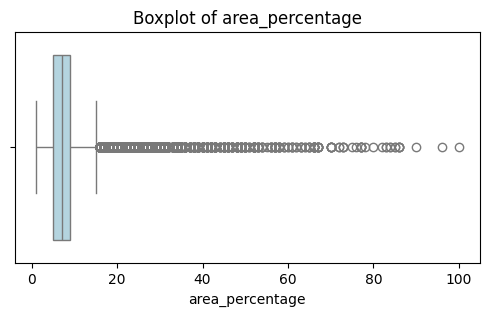

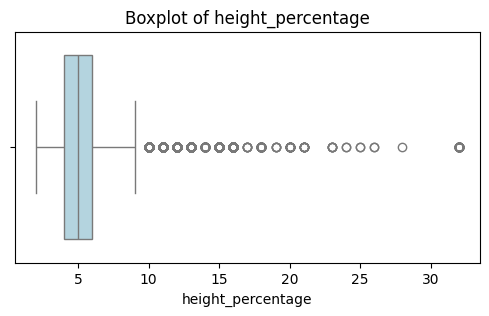

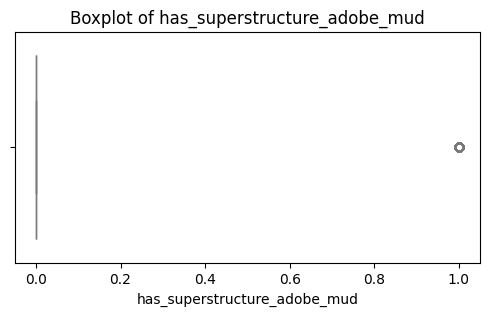

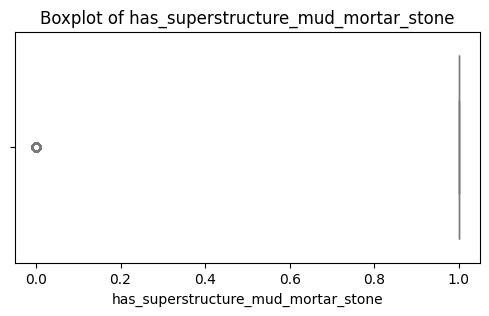

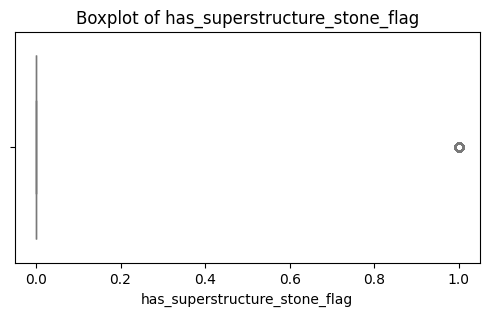

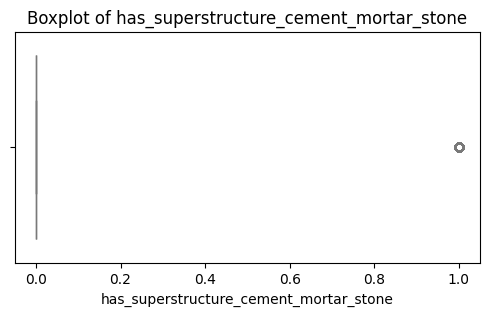

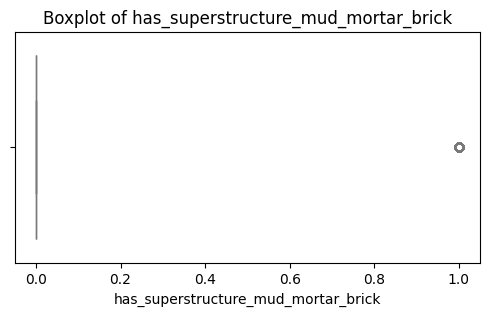

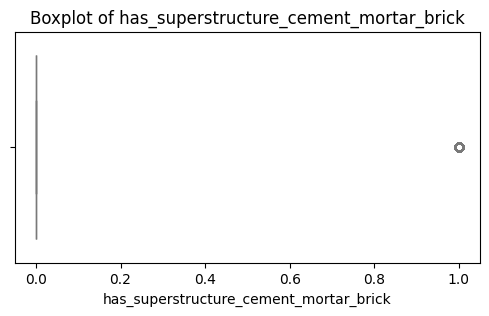

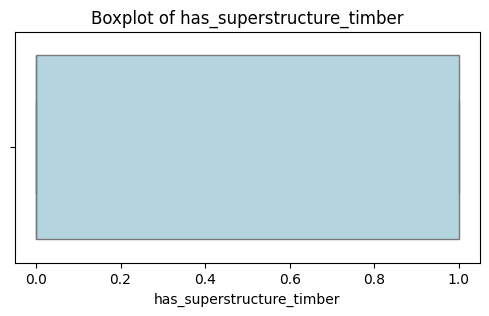

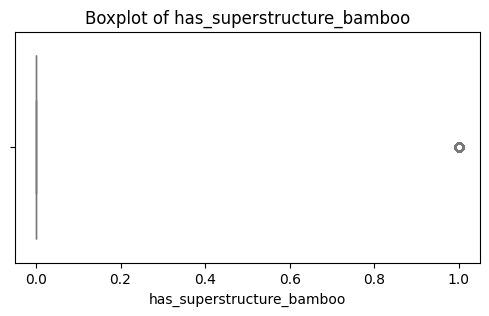

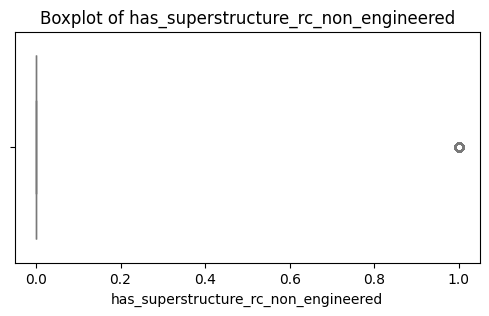

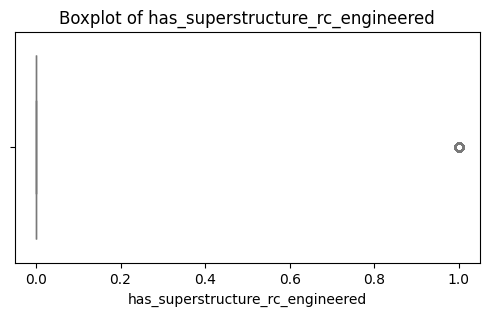

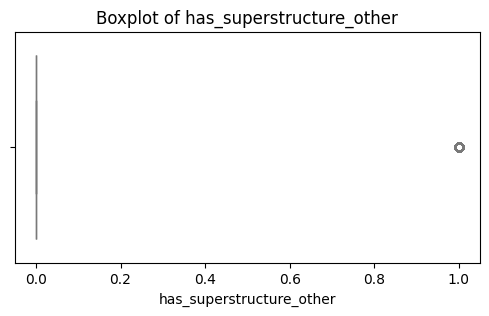

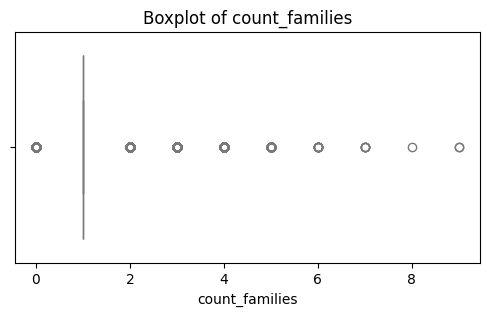

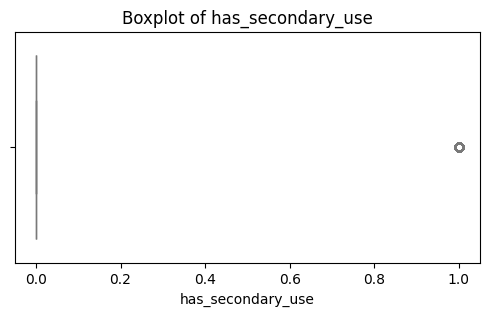

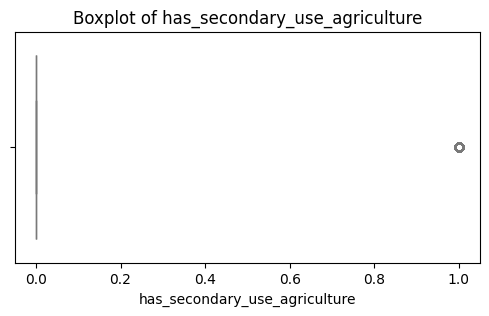

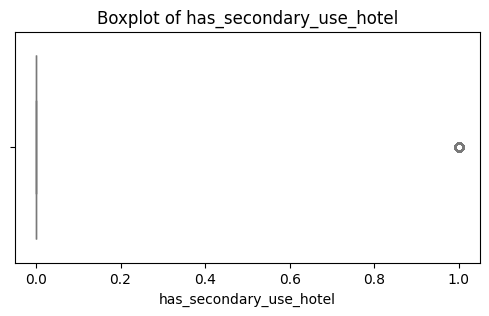

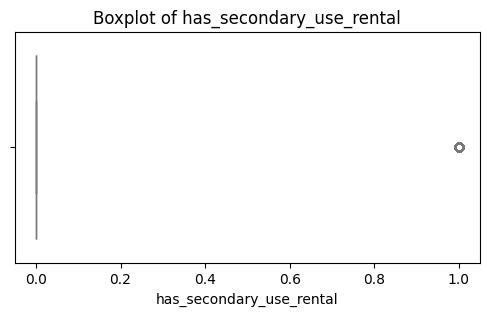

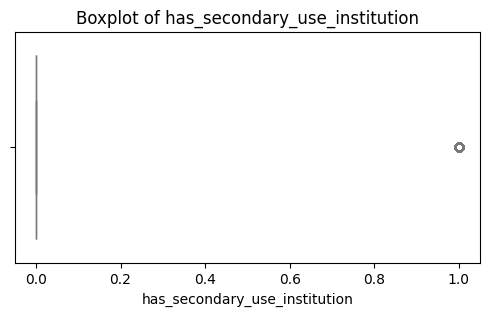

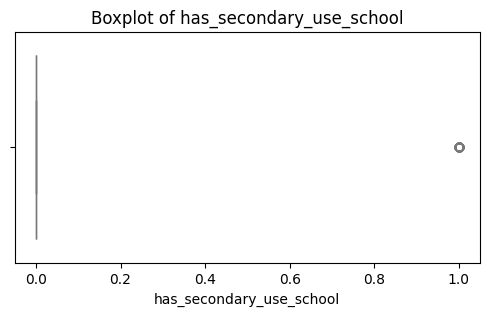

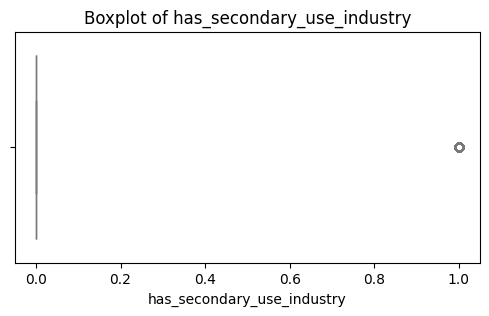

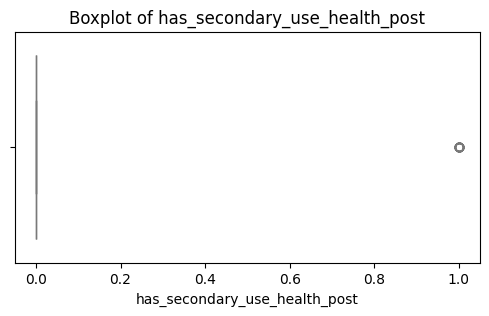

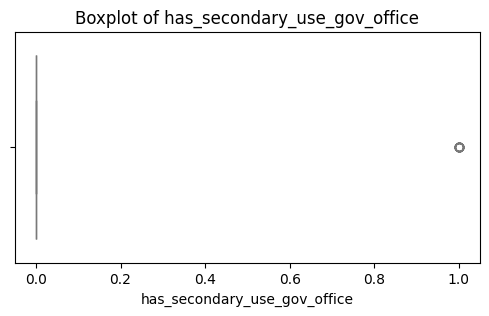

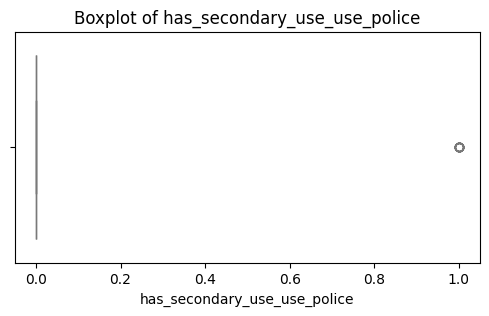

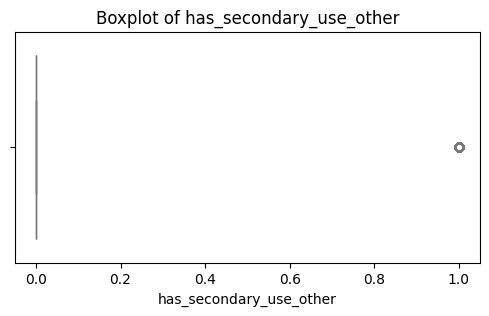

In [17]:
# Boxplots (Detect Outliers)
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


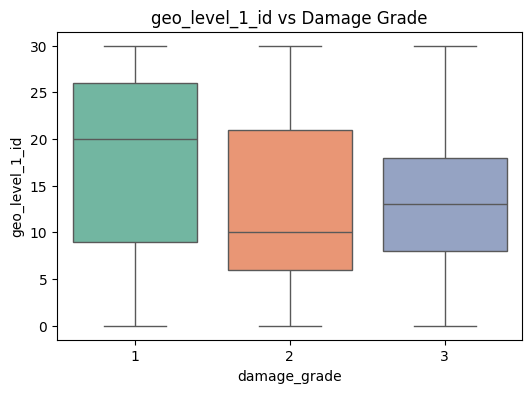

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


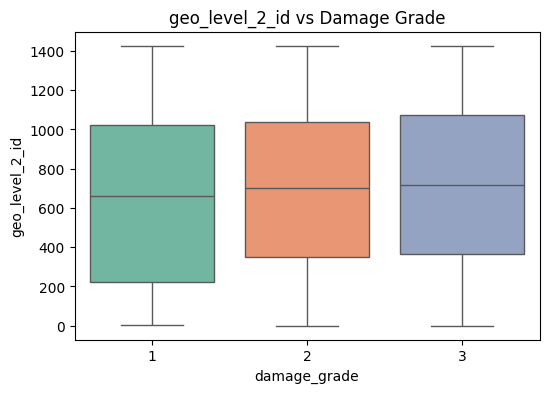

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


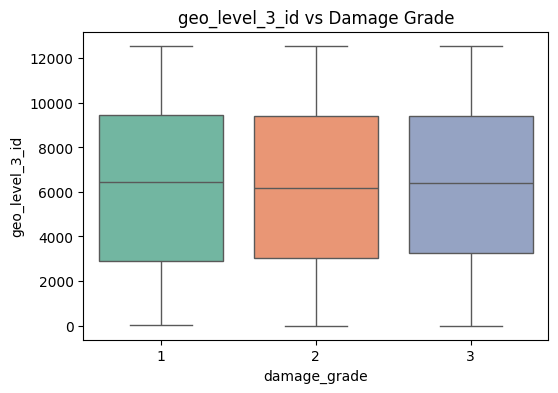

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


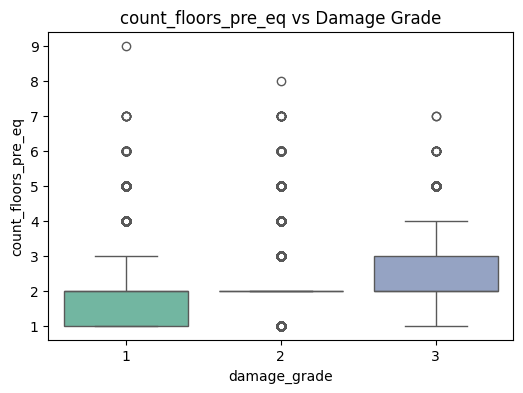

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


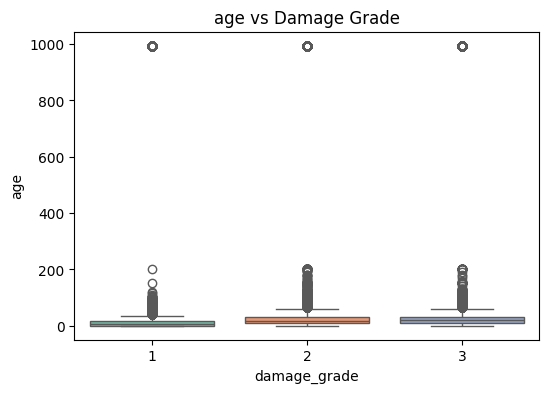

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


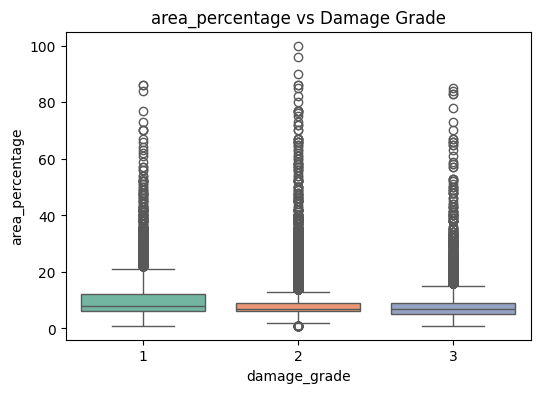

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


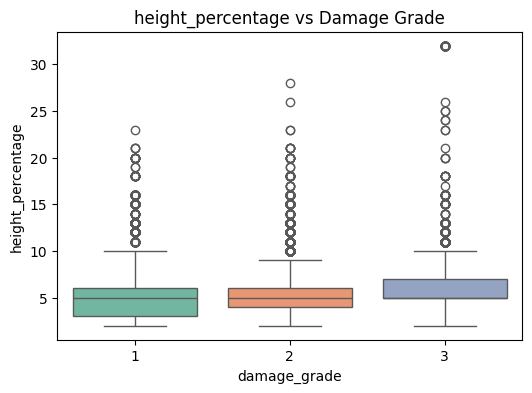

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


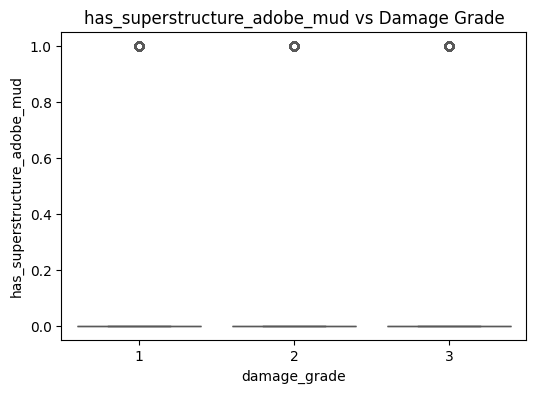

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


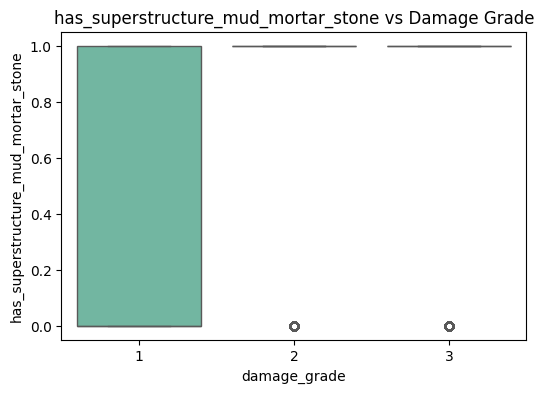

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


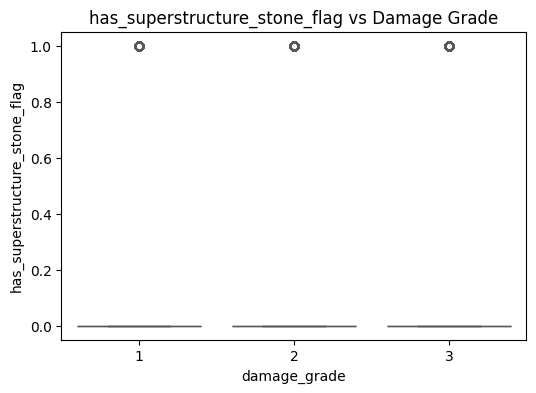

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


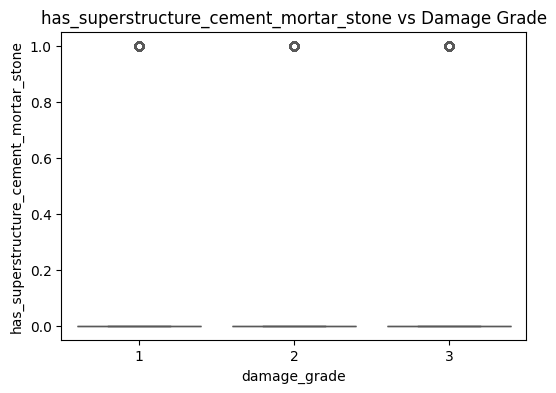

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


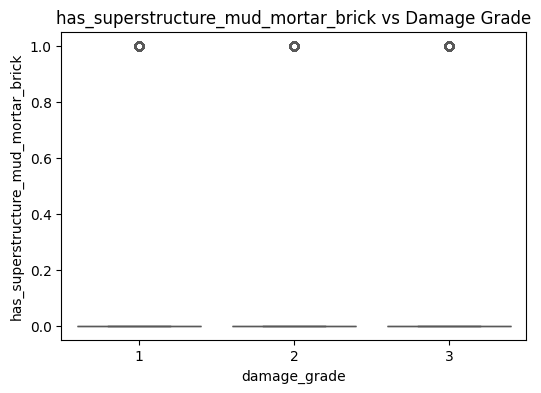

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


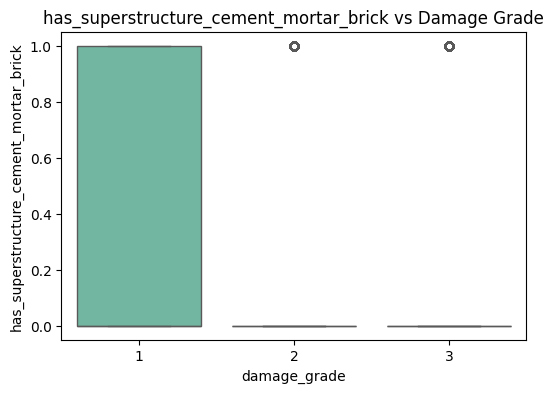

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


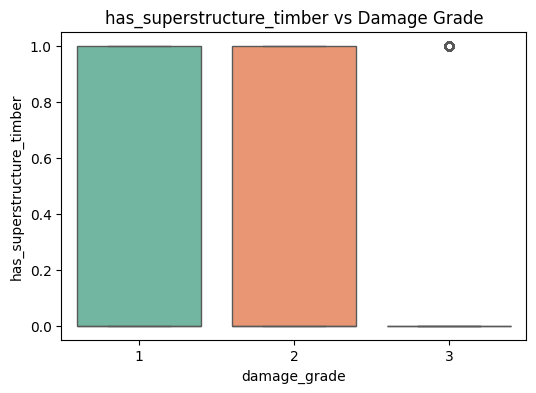

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


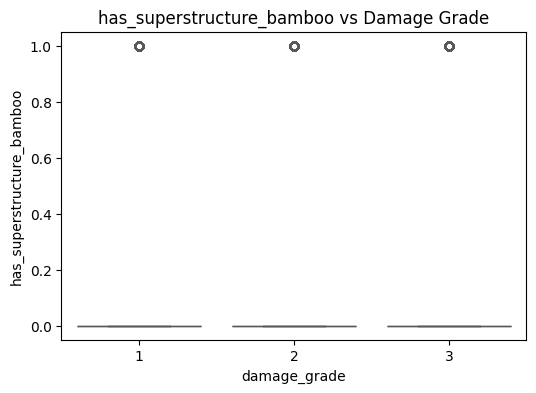

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


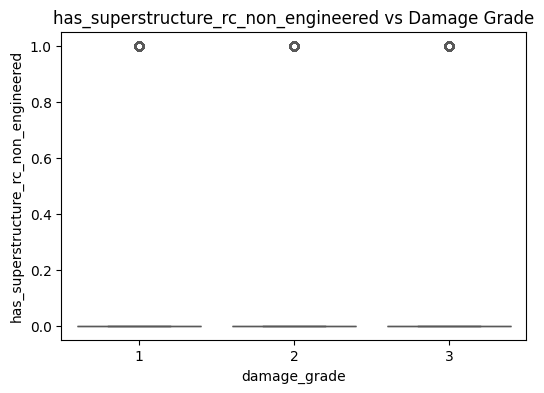

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


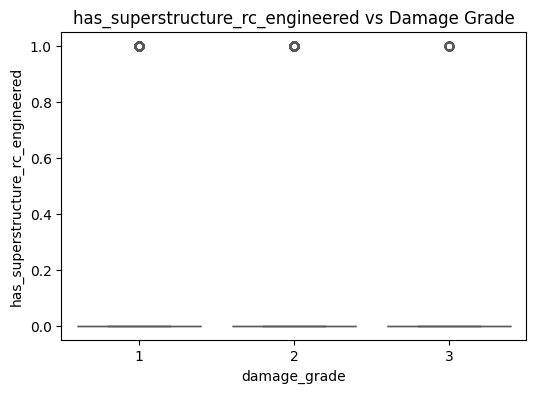

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


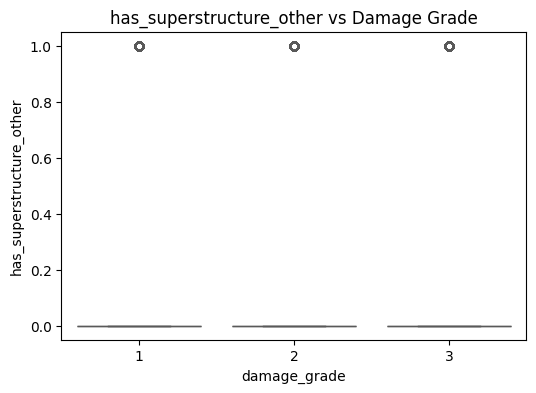

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


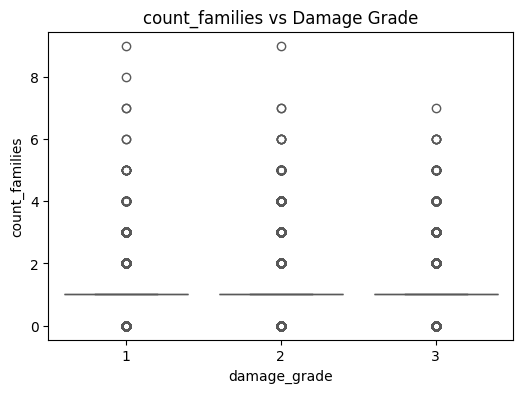

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


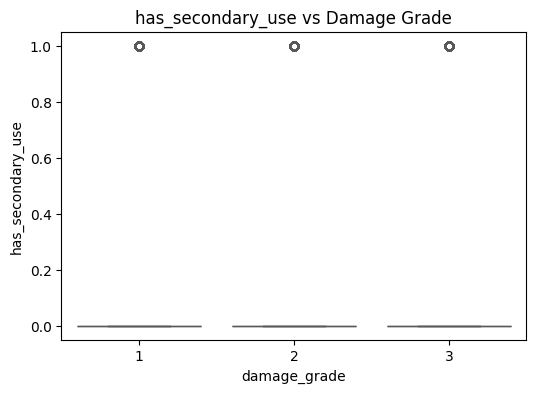

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


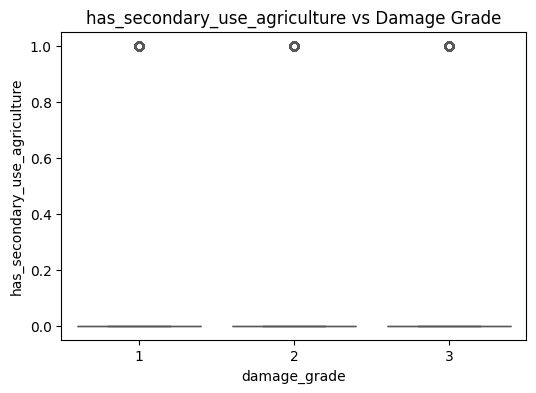

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


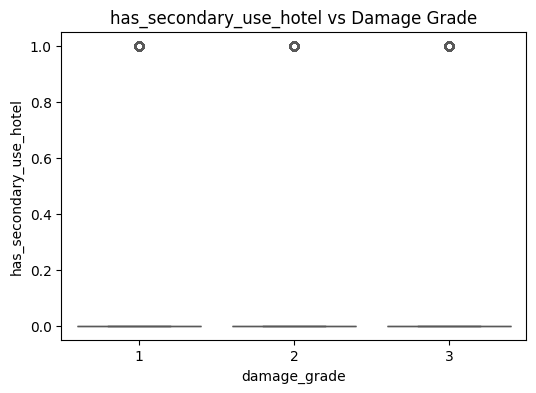

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


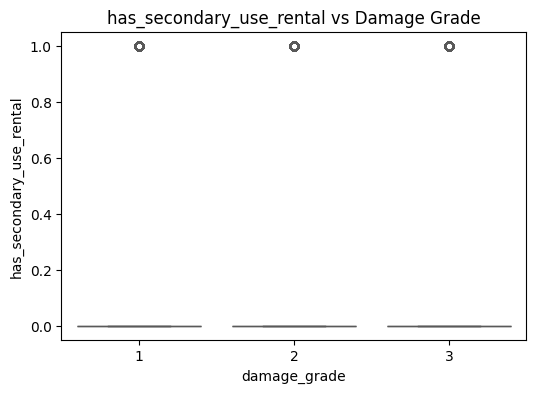

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


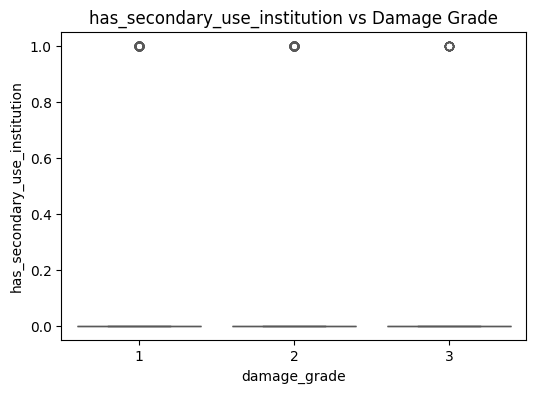

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


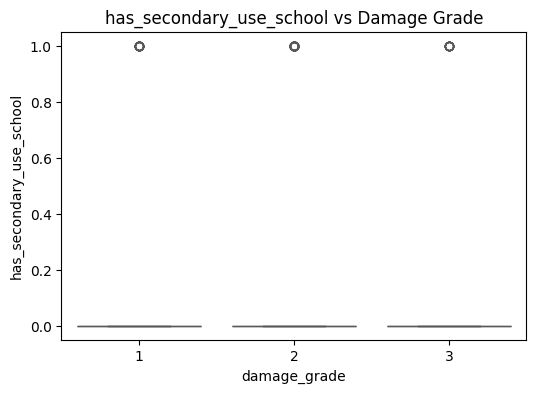

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


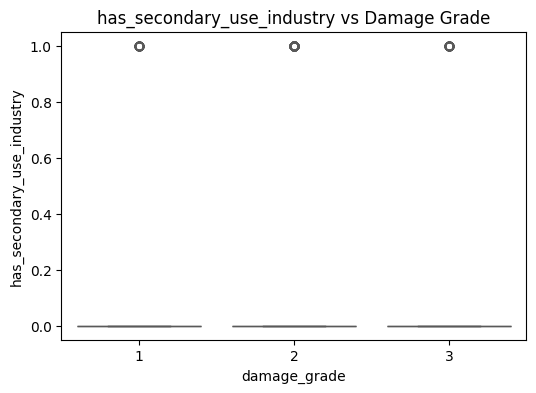

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


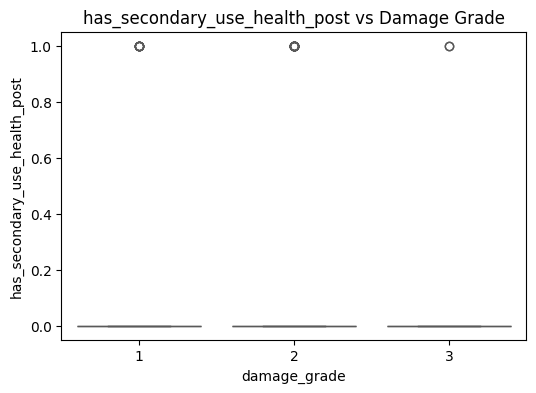

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


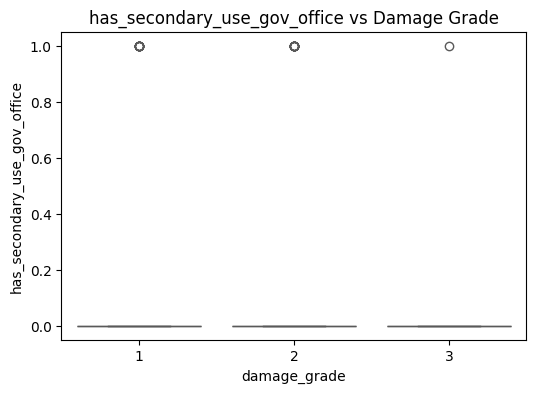

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


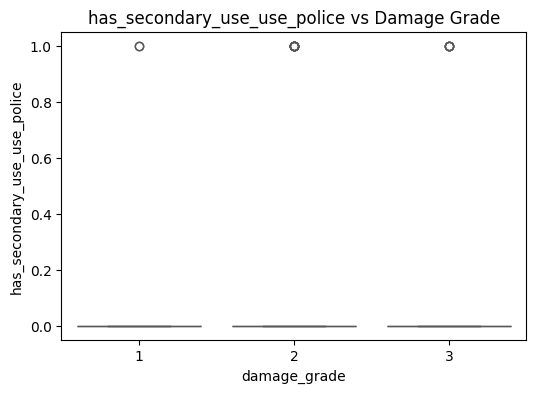

/tmp/ipython-input-18-3779124315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')


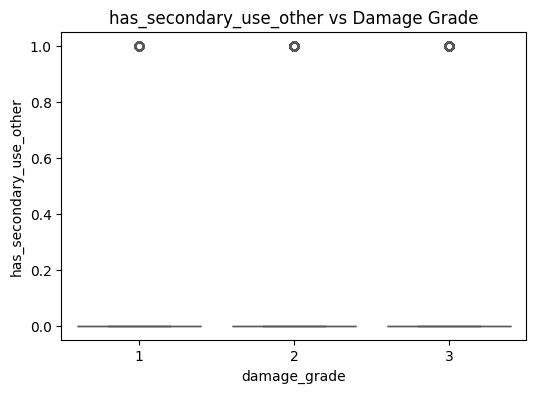

In [18]:
# Relationship with Target Variable
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='damage_grade', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Damage Grade')
    plt.show()

In [19]:
# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

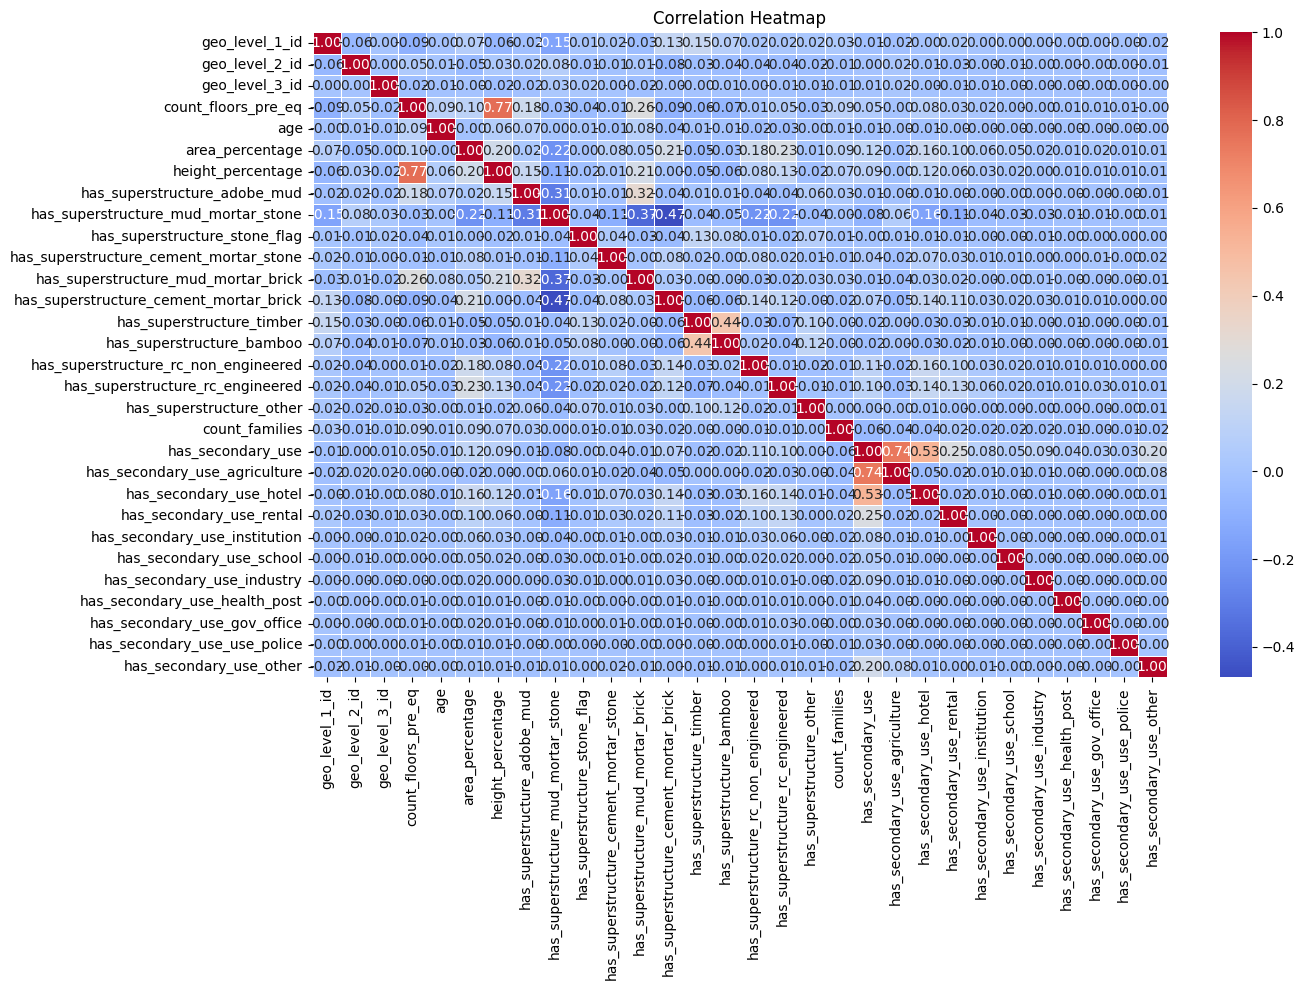

In [20]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [21]:
pip install pandas scikit-learn xgboost matplotlib seaborn

In [22]:
# Load the Data
import pandas as pd

train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

# Merge features and labels
df = pd.merge(train_values, train_labels, on='building_id')

In [23]:
# Drop 'building_id' if it exists
if 'building_id' in df.columns:
    df.drop('building_id', axis=1, inplace=True)

In [24]:
# Separate feature and target
X = df.drop('damage_grade', axis=1)
y = df['damage_grade']

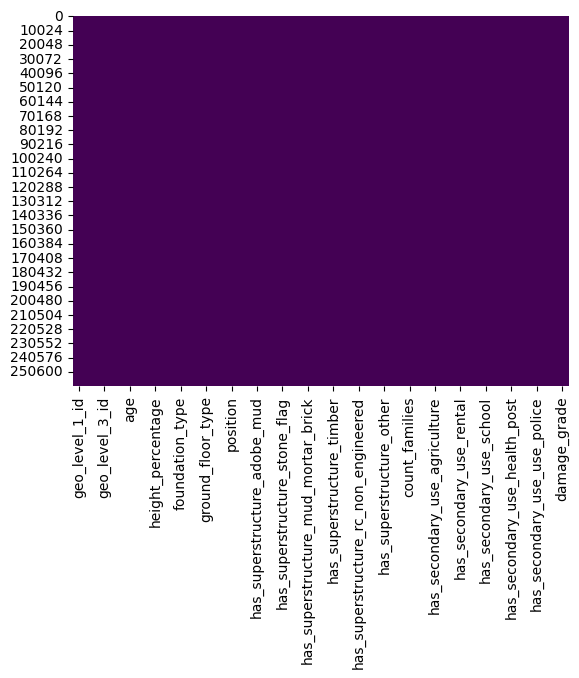

In [25]:
# Handle missing value
import seaborn as sns
sns.heatmap ( df.isnull(), cbar=False , cmap='viridis')
# remove missing value
df.dropna(inplace=True)

In [26]:
# Check if any missing values remain
print("Remaining missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Remaining missing values:
Series([], dtype: int64)


In [27]:
# Drop duplicate rows
df = df.drop_duplicates()

In [28]:
# Check how many full duplicate rows exist
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [29]:
# Standardize numerical columns (optional but good for deep learning):

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only the numerical columns from X
numerical_cols_X = X.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler only to the numerical columns
X[numerical_cols_X] = scaler.fit_transform(X[numerical_cols_X])

In [30]:
# Fill numerical missing values with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [31]:
# Encode categorical columns:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [32]:
# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [33]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# 3. One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Result: All categorical columns are now encoded as 0/1 dummy variables
print("Shape after encoding:", df.shape)
print("First few columns:", df.columns[:10])

Shape after encoding: (248282, 61)
First few columns: Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag'],
      dtype='object')


In [34]:
# FEATURE ENGINEERING START

# 1. Height per floor
df['height_per_floor'] = df['height_percentage'] / (df['count_floors_pre_eq'] + 1)

# 2. Age binning - Removing this as it was causing issues.
# df['age_bin'] = pd.cut(df['age'], bins=[0, 10, 30, 100], labels=['new', 'mid', 'old'])
# df = pd.get_dummies(df, columns=['age_bin'], drop_first=True)

# 3. Area per floor
# Using area_percentage instead of plinth_area_sq_ft as the latter doesn't exist
df['area_per_floor'] = df['area_percentage'] / (df['count_floors_pre_eq'] + 1)

# 4. Strong material score
strong_materials = [
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_rc_engineered'
]
df['strong_material_score'] = df[strong_materials].sum(axis=1)

# 5. Weak foundation flag - Removing this as it was causing issues.
# df['is_weak_foundation'] = df['foundation_type'].isin(['mud_mortar_stone', 'other']).astype(int)

# 6. Total number of superstructure types
superstructure_cols = [col for col in df.columns if 'has_superstructure_' in col]
df['num_superstructure_types'] = df[superstructure_cols].sum(axis=1)
# FEATURE ENGINEERING END

# Check new columns
print("New features added:\n", df[['height_per_floor', 'area_per_floor', 'strong_material_score',
                                  'num_superstructure_types']].head())

New features added:
    height_per_floor  area_per_floor  strong_material_score  \
0          1.666667        2.000000                      0   
1          2.333333        2.666667                      0   
2          1.666667        1.666667                      0   
3          1.666667        2.000000                      0   
4          2.250000        2.000000                      0   

   num_superstructure_types  
0                         2  
1                         1  
2                         1  
3                         3  
4                         1  


Split the data ( Train / Test Split )

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Split the data
X_train, X_valid , y_train , y_valid = train_test_split(df.drop(columns=['damage_grade']), df['damage_grade'] - 1, test_size=0.2, random_state=42)

Model creation

In [37]:
# Model Creation & Training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

🎯 Accuracy: 0.6980687516362245

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.45      0.52      4915
           1       0.71      0.82      0.76     28275
           2       0.69      0.57      0.62     16467

    accuracy                           0.70     49657
   macro avg       0.68      0.61      0.63     49657
weighted avg       0.70      0.70      0.69     49657


🧱 Confusion Matrix:
 [[ 2188  2611   116]
 [ 1146 23139  3990]
 [  133  6997  9337]]


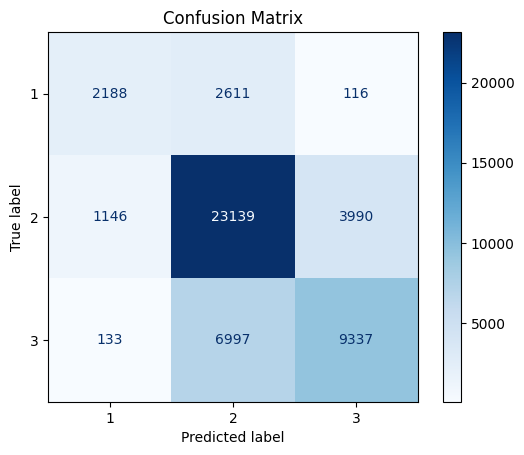

In [38]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib

# Step 2: Initialize the model
model = RandomForestClassifier(random_state=42)

# Step 3: Fit the model on training data
model.fit(X_train, y_train)

# Step 4: Make predictions on validation data
y_pred = model.predict(X_valid)

# Step 5: Evaluate the model
print("🎯 Accuracy:", accuracy_score(y_valid, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_valid, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))

# Print and plot confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Plot the confusion matrix and visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

✅ Accuracy: 0.6980687516362245

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.45      0.52      4915
           1       0.71      0.82      0.76     28275
           2       0.69      0.57      0.62     16467

    accuracy                           0.70     49657
   macro avg       0.68      0.61      0.63     49657
weighted avg       0.70      0.70      0.69     49657


🧱 Confusion Matrix:
[[ 2188  2611   116]
 [ 1146 23139  3990]
 [  133  6997  9337]]


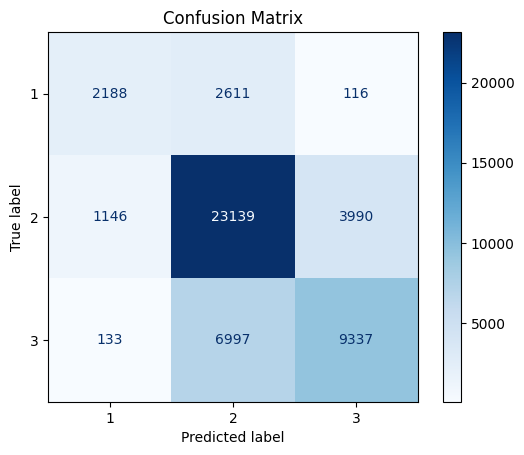

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on validation data
y_pred = model.predict(X_valid)

# Calculate and print accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("✅ Accuracy:", accuracy)

# Print classification report
print("\n📊 Classification Report:")
print(classification_report(y_valid, y_pred))

# Print and plot confusion matrix
print("\n🧱 Confusion Matrix:")
cm = confusion_matrix(y_valid, y_pred)
print(cm)

# Plot the confusion matrix (requires matplotlib) and visualize the confusion matrix also
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [40]:
# Predict damage_grade on validation set
y_pred = model.predict(X_valid)

In [41]:
# Predict class probabilities (useful for advanced metrics or ensembles)
y_proba = model.predict_proba(X_valid)

In [42]:
# Convert Probabilities to Predicted Classes
import numpy as np

# Choose the class with the highest probability for each row
y_pred = np.argmax(y_proba, axis=1) + 1  # Add +1 if your original labels were 1-indexed

In [43]:
# Convert Probabilities to Class Labels
y_pred = np.argmax(y_proba, axis=1) + 1  # Add +1 if your labels are 1, 2, 3

XBOOST

In [44]:

pip install xgboost

In [45]:
#Import and Initialize XGBoost
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(
    use_label_encoder=False,   # to avoid warning
    eval_metric='mlogloss',    # recommended for multi-class
    random_state=42
)

In [46]:
# Fit the model to your training data
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:47:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
#Predict and Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on validation set
y_pred = xgb_model.predict(X_valid)

# Evaluation
print(" Accuracy:", round(accuracy_score(y_valid, y_pred) * 100, 2), "%")
print("\n Classification Report:\n", classification_report(y_valid, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))

 Accuracy: 72.38 %

 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.45      0.54      4915
           1       0.72      0.86      0.78     28275
           2       0.75      0.58      0.65     16467

    accuracy                           0.72     49657
   macro avg       0.72      0.63      0.66     49657
weighted avg       0.73      0.72      0.71     49657


 Confusion Matrix:
 [[ 2209  2655    51]
 [  940 24244  3091]
 [   76  6900  9491]]


CATBOOST

In [48]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.1 MB/s eta 0:00:00


In [49]:
#Import & Train CatBoost

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train CatBoost
cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=100,
    random_state=42
)

# Train the model
cat_model.fit(X_train, y_train)

#Predict on Validation Set

# Predict
y_pred_cat = cat_model.predict(X_valid)
y_pred_cat = y_pred_cat.flatten()  # Convert from 2D array to 1D if needed

print(" CatBoost Accuracy:", accuracy_score(y_valid, y_pred_cat))
print(" Classification Report:\n", classification_report(y_valid, y_pred_cat))

0:	learn: 1.0462042	total: 269ms	remaining: 2m 14s
100:	learn: 0.6951311	total: 33.6s	remaining: 2m 12s
200:	learn: 0.6702616	total: 53.4s	remaining: 1m 19s
300:	learn: 0.6547876	total: 1m 8s	remaining: 45.4s
400:	learn: 0.6437299	total: 1m 24s	remaining: 20.8s
499:	learn: 0.6353910	total: 1m 39s	remaining: 0us
 CatBoost Accuracy: 0.7133133294399581
 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.42      0.52      4915
           1       0.70      0.86      0.77     28275
           2       0.75      0.55      0.63     16467

    accuracy                           0.71     49657
   macro avg       0.71      0.61      0.64     49657
weighted avg       0.72      0.71      0.70     49657



LIGHTGBM

In [50]:
pip install lightgbm

In [51]:
#Import and Train LightGBM

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
lgb_model = LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

lgb_model.fit(X_train, y_train)

#Predict on Validation Set

y_pred_lgb = lgb_model.predict(X_valid)

#Evaluate Model Performance

print("✅ LightGBM Accuracy:", accuracy_score(y_valid, y_pred_lgb))
print("📊 Classification Report:\n", classification_report(y_valid, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.243719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 198625, number of used features: 63
[LightGBM] [Info] Start training from score -2.320235
[LightGBM] [Info] Start training from score -0.561989
[LightGBM] [Info] Start training from score -1.103599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [52]:
import lightgbm as lgb

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=50)]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.248193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 198625, number of used features: 63
[LightGBM] [Info] Start training from score -2.320235
[LightGBM] [Info] Start training from score -0.561989
[LightGBM] [Info] Start training from score -1.103599
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

LGBMClassifier(max_depth=6, n_estimators=200, random_state=42)

MODEL COMPARISION

In [53]:
# Prepare All Models into a Dictionary

# Assuming all models are already trained
models = {
    "Random Forest": model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "CatBoost": cat_model
    # Optionally add Logistic or MLP if implemented
    # "Logistic Regression": log_model,
    # "MLPClassifier": mlp_model
}

In [54]:
# Loop Over Models and Compare Accuracy

from sklearn.metrics import accuracy_score

accuracies = {}

for name, model in models.items():
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    accuracies[name] = acc
    print(f"{name}: {round(acc * 100, 2)}%")

Random Forest: 69.81%
XGBoost: 72.38%
LightGBM: 71.68%
CatBoost: 71.33%


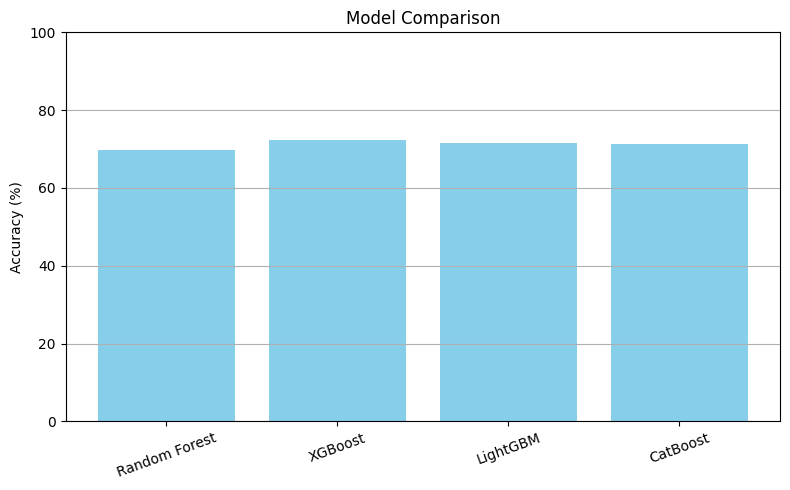

In [55]:
# Plot a Bar Chart for Visual Comparison

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), [v * 100 for v in accuracies.values()], color='skyblue')
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [56]:
# Hyperparameter ( Artificial Neural_Network)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the ANN model
ann = MLPClassifier(max_iter=300, random_state=42)

# Fast hyperparameter grid
param_grid_ann_fast = {
    'hidden_layer_sizes': [(64,), (128,)],
    'activation': ['relu'],
    'alpha': [0.0001],
    'learning_rate': ['adaptive']
}

# Setup grid search
grid_ann_fast = GridSearchCV(
    estimator=ann,
    param_grid=param_grid_ann_fast,
    scoring='accuracy',
    cv=2,              # Use 2-fold to speed up
    verbose=1,
    n_jobs=-1
)

# Train
grid_ann_fast.fit(X_train, y_train)

# Evaluate
best_ann_fast = grid_ann_fast.best_estimator_
y_pred_ann = best_ann_fast.predict(X_valid)

print(" Fast ANN Accuracy:", accuracy_score(y_valid, y_pred_ann))
print(" Classification Report:\n", classification_report(y_valid, y_pred_ann))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
 Fast ANN Accuracy: 0.5971162172503374
 Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.45      0.49      4915
           1       0.66      0.66      0.66     28275
           2       0.51      0.54      0.52     16467

    accuracy                           0.60     49657
   macro avg       0.57      0.55      0.56     49657
weighted avg       0.60      0.60      0.60     49657



## Final Evaluate the Tuned Model

In [57]:
# Evaluate the tuned MLP model on the validation set
y_pred_ann = best_ann_fast.predict(X_valid) # Make predictions using the best tuned model
print(" Tuned ANN Accuracy:", accuracy_score(y_valid, y_pred_ann))
print(" Classification Report:\n", classification_report(y_valid, y_pred_ann))

 Tuned ANN Accuracy: 0.5971162172503374
 Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.45      0.49      4915
           1       0.66      0.66      0.66     28275
           2       0.51      0.54      0.52     16467

    accuracy                           0.60     49657
   macro avg       0.57      0.55      0.56     49657
weighted avg       0.60      0.60      0.60     49657



Feature importance

Top 20 Feature Importances:
                                Feature  Importance
1                        geo_level_2_id        4010
0                        geo_level_1_id        3235
2                        geo_level_3_id        2407
4                                   age         784
60                     height_per_floor         671
5                       area_percentage         645
61                       area_per_floor         635
6                     height_percentage         429
63             num_superstructure_types         358
3                   count_floors_pre_eq         298
8   has_superstructure_mud_mortar_stone         296
18                       count_families         265
36                          roof_type_q         253
13            has_superstructure_timber         208
40                  ground_floor_type_x         157
9         has_superstructure_stone_flag         152
42                   other_floor_type_q         152
11  has_superstructure_mud_mortar_br

/tmp/ipython-input-58-3606519648.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')


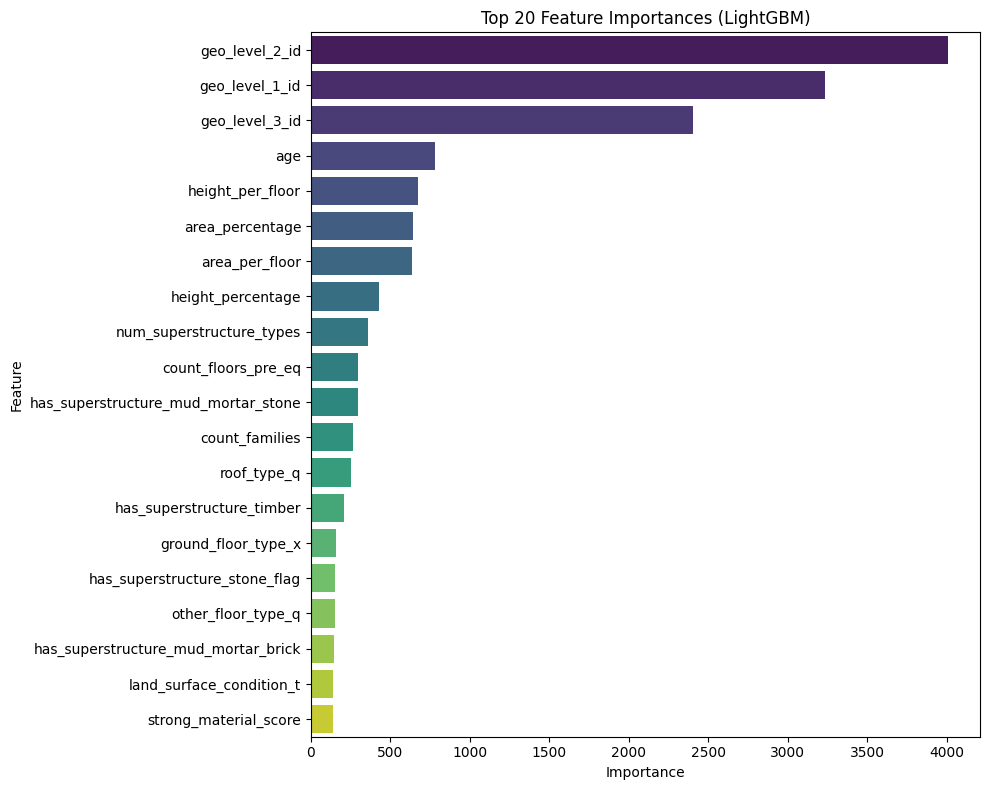

In [58]:
# Calculate Feature Importance for the best model (LightGBM)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming lgb_model is your best trained model
# Feature importances are available after fitting the model
feature_importances = lgb_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Print top N features (optional)
print("Top 20 Feature Importances:")
print(features_df.head(20))

# Visualize feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Preprocess Test Set

In [60]:
from google.colab import files
uploaded = files.upload()

Saving train_values.csv to train_values (1).csv


In [61]:
import os
print(os.listdir())  # You should see 'test_values.csv' listed

['.config', 'train_values.csv', 'train_values (1).csv', 'train_labels.csv', 'catboost_info', 'sample_data']


In [69]:
# Load the test data
test_values = pd.read_csv('/content/train_values.csv')

# Store building_id for submission
test_building_ids = test_values['building_id']

# Drop 'building_id' from the test set features
if 'building_id' in test_values.columns:
    test_values.drop('building_id', axis=1, inplace=True)

# Apply the same feature engineering steps as the training data

# 1. Height per floor
test_values['height_per_floor'] = test_values['height_percentage'] / (test_values['count_floors_pre_eq'] + 1)

# 2. Area per floor
test_values['area_per_floor'] = test_values['area_percentage'] / (test_values['count_floors_pre_eq'] + 1)

# 3. Strong material score
strong_materials = [
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_rc_engineered'
]
test_values['strong_material_score'] = test_values[strong_materials].sum(axis=1)

# 4. Total number of superstructure types
superstructure_cols_test = [col for col in test_values.columns if 'has_superstructure_' in col]
test_values['num_superstructure_types'] = test_values[superstructure_cols_test].sum(axis=1)


# Apply the same encoding to categorical features as used in the training data
# Use the label_encoders fitted on the training data
for col, le in label_encoders.items():
    if col in test_values.columns:
        # Handle potential new categories in test data not seen in training
        test_values[col] = test_values[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, '<unknown>') # Add unknown to classes
        test_values[col] = le.transform(test_values[col])

# One-Hot Encode categorical variables in the test set
# Align columns with the training set after one-hot encoding
test_values = pd.get_dummies(test_values, columns=cat_cols, drop_first=True)

# Align columns - add missing columns that were in training but not in test (fill with 0)
missing_cols = set(X_train.columns) - set(test_values.columns)
for c in missing_cols:
    test_values[c] = 0

# Ensure the order of columns is the same as the training set
test_values = test_values[X_train.columns]

print("Test set shape after preprocessing:", test_values.shape)
display(test_values.head())

Test set shape after preprocessing: (260601, 64)


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,height_per_floor,area_per_floor,strong_material_score,num_superstructure_types
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,1.666667,2.000000,0,2
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,2.333333,2.666667,0,1
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,1.666667,1.666667,0,1
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,1.666667,2.000000,0,3
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,2.250000,2.000000,0,1


Predict on test set

In [70]:
# Predict on the test set using the best model (LightGBM)
test_predictions = lgb_model.predict(test_values)

# Since the target variable was shifted by -1 for training (0, 1, 2),
# we need to add 1 back to get the original damage grades (1, 2, 3)
test_predictions = test_predictions + 1

print("First 10 predictions on the test set:", test_predictions[:10])

First 10 predictions on the test set: [2 2 3 2 2 2 2 1 2 1]


Create submission file

In [71]:
# Create Submission File

# Create a DataFrame with building_id and damage_grade
submission_df = pd.DataFrame({
    'building_id': test_building_ids,
    'damage_grade': test_predictions
})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
display(submission_df.head())

Submission file created successfully!


,building_id,damage_grade
0,802906,2
1,28830,2
2,94947,3
3,590882,2
4,201944,2


Save the final model

In [72]:
import joblib

# Define the filename for the saved model
model_filename = 'best_earthquake_damage_model.pkl'

# Save the trained model
joblib.dump(lgb_model, model_filename)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as best_earthquake_damage_model.pkl


# CHALLENGE FACES

* File Access & Setup (Colab)

Encountered FileNotFoundError when loading test data due to missing uploads or incorrect filenames. This was resolved by correctly uploading files and verifying file paths.

* Test Set Preprocessing

A common issue was mismatched columns or encoders between training and test sets, causing KeyError or shape mismatch during prediction. This required careful feature alignment and fallback strategies.

* ANN Training Time

ANN models (MLPClassifier) were slow to train, especially with large parameter grids. This was addressed by simplifying the hyperparameter space and using RandomizedSearchCV instead of GridSearchCV.

* Label Encoding Consistency

Reusing the same LabelEncoder instances across training and test sets was critical. When encoders were lost, fallback encoding strategies were used to ensure test set compatibility.

* Model Selection and Trade-offs

Balancing accuracy, training time, and interpretability across models was a challenge. While ANN offered deep learning flexibility, tree-based models like XGBoost performed comparably with less effort.

* Submission Format

Generating the correct submission.csv format (building_id, damage_grade) was essential. Errors in column naming or missing IDs caused submission failures early on.

# Final Outcome

A robust and tested prediction pipeline was developed, capable of transforming raw structural data into accurate damage grade predictions. The project not only built technical skills in feature engineering, model tuning, and pipeline design, but also simulated a real-world machine learning workflow from data ingestion to deployment.


# Conclusion

The Earthquake Damage Prediction project successfully demonstrated the application of machine learning techniques to a real-world disaster scenario. By systematically preprocessing the data, engineering meaningful structural features, and evaluating multiple classification models, we were able to develop an effective pipeline for predicting building damage grades based on structural attributes.

Among the various models tested, tree-based algorithms such as XGBoost and Random Forest delivered strong performance, while Artificial Neural Networks (ANN) were optimized through hyperparameter tuning to explore deep learning capabilities. Careful preprocessing of the test set ensured consistency and robustness in predictions.

The project highlighted the importance of aligning domain knowledge with machine learning workflows — especially in tasks involving tabular data and multiclass classification. It also emphasized practical challenges like test-time feature engineering, encoding consistency, and model tuning for scalability and accuracy.

This end-to-end solution can serve as a strong foundation for further development in disaster impact assessment, urban risk modeling, and rapid response planning.

